In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [6]:
handle_capital_gain(df)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


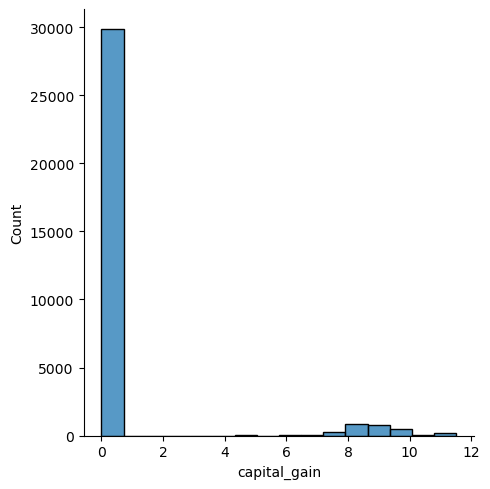

In [8]:
sns.displot(df['capital_gain'])

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [11]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing outliers from hours_per_week

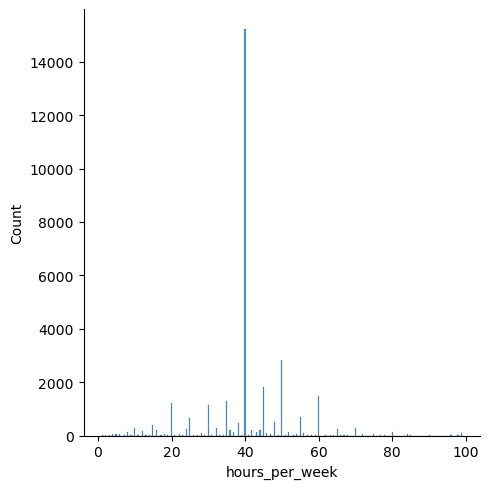

In [12]:
sns.displot(df['hours_per_week'])

<Axes: ylabel='hours_per_week'>

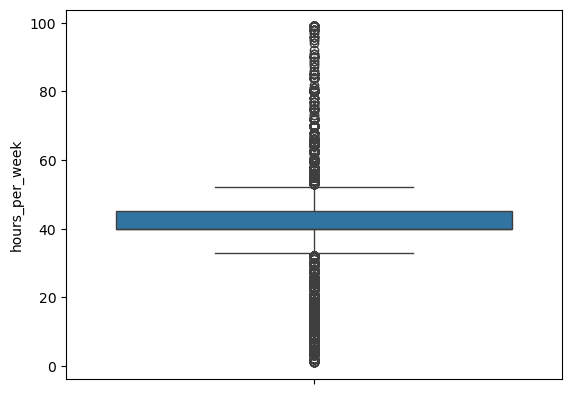

In [13]:
sns.boxplot(df['hours_per_week'])

In [14]:
def remove_outliers_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [15]:
remove_outliers_hours_per_week(df)

C:\Users\suriy\AppData\Local\Temp\ipykernel_11768\3376950392.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range


<Axes: ylabel='hours_per_week'>

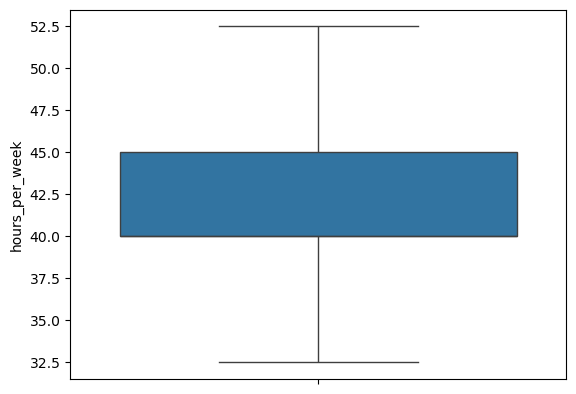

In [16]:
sns.boxplot(df['hours_per_week'])

## Removing outliers from education_num

C:\Users\suriy\AppData\Local\Temp\ipykernel_11768\2166443936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['education_num'])


<Axes: xlabel='education_num', ylabel='Density'>

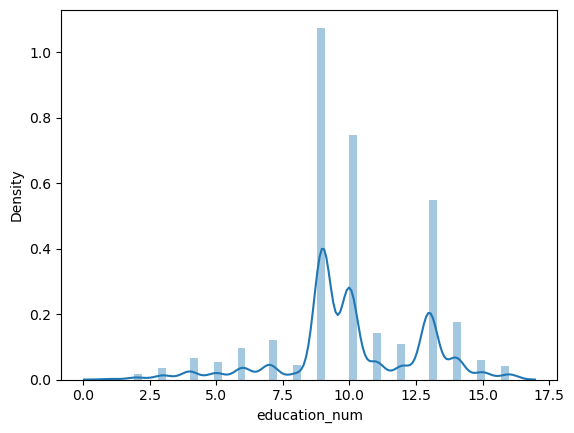

In [17]:
sns.distplot(df['education_num'])   

<Axes: ylabel='education_num'>

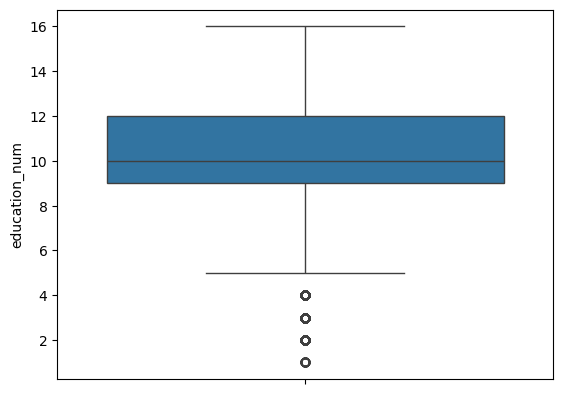

In [18]:
sns.boxplot(df['education_num'])

In [19]:
def remove_outliers_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range


In [20]:
remove_outliers_education_num(df)

C:\Users\suriy\AppData\Local\Temp\ipykernel_11768\510890651.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range


<Axes: ylabel='education_num'>

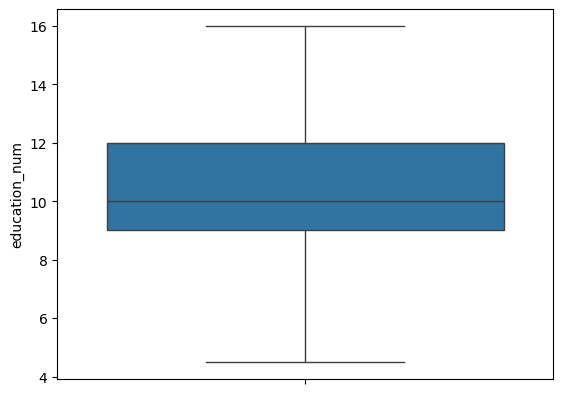

In [21]:
sns.boxplot(df['education_num'])

## Removing outliers from capital_loss

C:\Users\suriy\AppData\Local\Temp\ipykernel_11768\1583422250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_loss'])


<Axes: xlabel='capital_loss', ylabel='Density'>

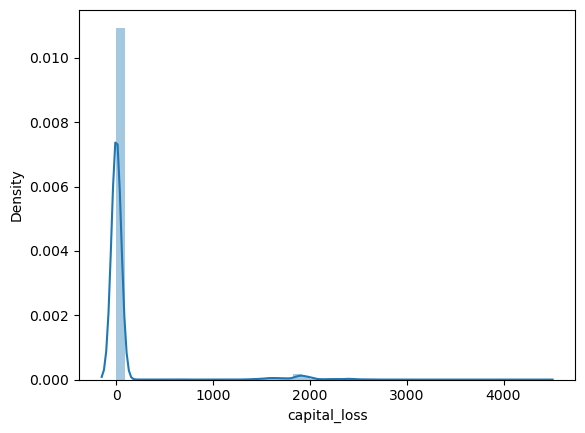

In [22]:
sns.distplot(df['capital_loss'])

In [23]:
def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss']==0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

In [24]:
capital_loss_log(df)

C:\Users\suriy\AppData\Local\Temp\ipykernel_11768\1583422250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_loss'])


<Axes: xlabel='capital_loss', ylabel='Density'>

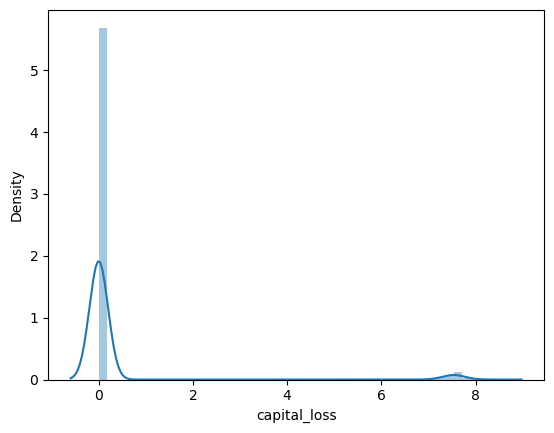

In [25]:
sns.distplot(df['capital_loss'])

<Axes: ylabel='capital_loss'>

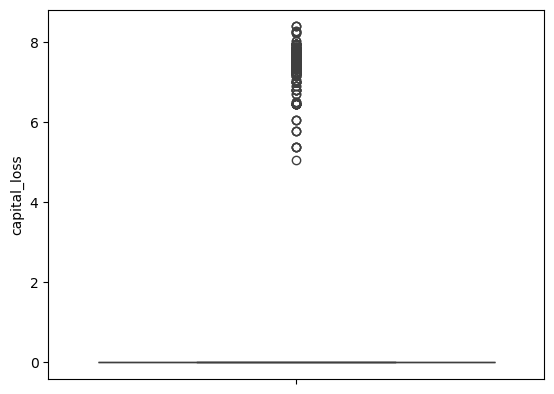

In [26]:
sns.boxplot(df['capital_loss'])

In [27]:
def remove_outliers_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [28]:
remove_outliers_capital_loss(df)

<Axes: ylabel='capital_loss'>

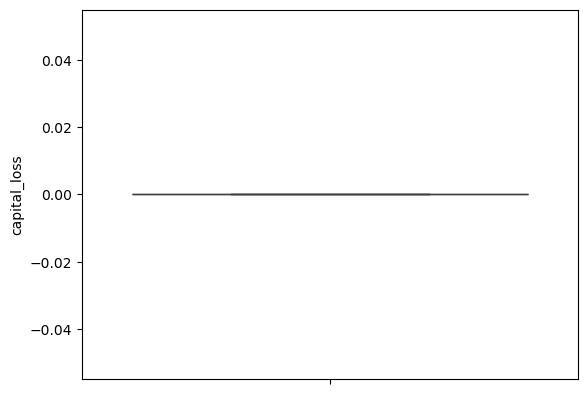

In [29]:
sns.boxplot(df['capital_loss'])

## Feature Egineering

In [30]:
def feature_engineering(df):
    
    # convert the salary into 1 if salary is greater then 50K else 0
    df['salary'] = df['salary'].replace(' >50K', '>50K')
    df['salary'] = np.where(df['salary'] > '50K', 1, 0)
    
    # convert the sex column into 0 and 1, if male then 1 else 0
    df['sex'] = np.where(df['sex']=='Male', 1, 0)
    
    # {0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other'}
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    # {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative}
    label_enco_relationship = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relationship)
    
    # {0: Adm-clerical,1: Exec-managerial,2: Handlers-cleaners,3: Prof-specialty,4: Other-service,5: Sales,6: Craft-repair,7: Transport-moving,8: Farming-fishing,9: Machine-op-inspct,10: Tech-support,11: Protective-serv,12: Armed-Forces,13: Priv-house-serv}
    df['occupation'] = np.where(df['occupation']==' ?', 'Missing',df['occupation'])
    label_enco_occupation = {value: key for key, value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(label_enco_occupation)
    
    # {0: Never-married,1: Married-civ-spouse,2: Divorced,3: Married-spouse-absent,4: Separated,5: Married-AF-spouse,6: Widowed}
    label_enco_martial_status = {value :key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_martial_status)
    
    # {0: Bachelor,1: HS-grad,2: 11th,3: Masters,4: 9th,5: Some-college,6: Assoc-acdm,7: Assoc-voc,8: 7th-8th,9: Doctorate,10: Prof-school,11: 5th-6th,12: 10th,13: 1st-4th,14: Preschool,15: 12th}
    label_enco_education = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map((label_enco_education))
    
    # {0: State-gov,1: Self-emp-not-inc,2: Private,3: Federal-gov,4: Local-gov,5: ?,6: Self-emp-inc,7: Without-pay,8: Never-worked}
    df['workclass'] = np.where(df['workclass']==' ?', 'Missing',df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)
    
    # {' United-states': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' ?': 4, ' Mexico': 5, ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8, ' England': 9, ' Canada': 10, ' Germany': 11, ' Iran': 12, ' Philippines': 13, ' Italy': 14, ' Poland': 15, ' Columbia': 16, ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20, ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24, ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28, ' Japan': 29, ' Yugoslavia': 30, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33, ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36, ' Vietnam': 37, ' Hong': 38, ' Ireland': 39, ' Hungary': 40, ' Holand-Netherlands': 41}
    df['native_country'] = np.where(df['native_country']==' ?', 'Missing',df['native_country'])
    label_enco_native_country = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_native_country) 
    

In [31]:
feature_engineering(df)

In [32]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,83311,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,215646,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,234721,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,338409,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


## After doing feature Engineering

<Axes: >

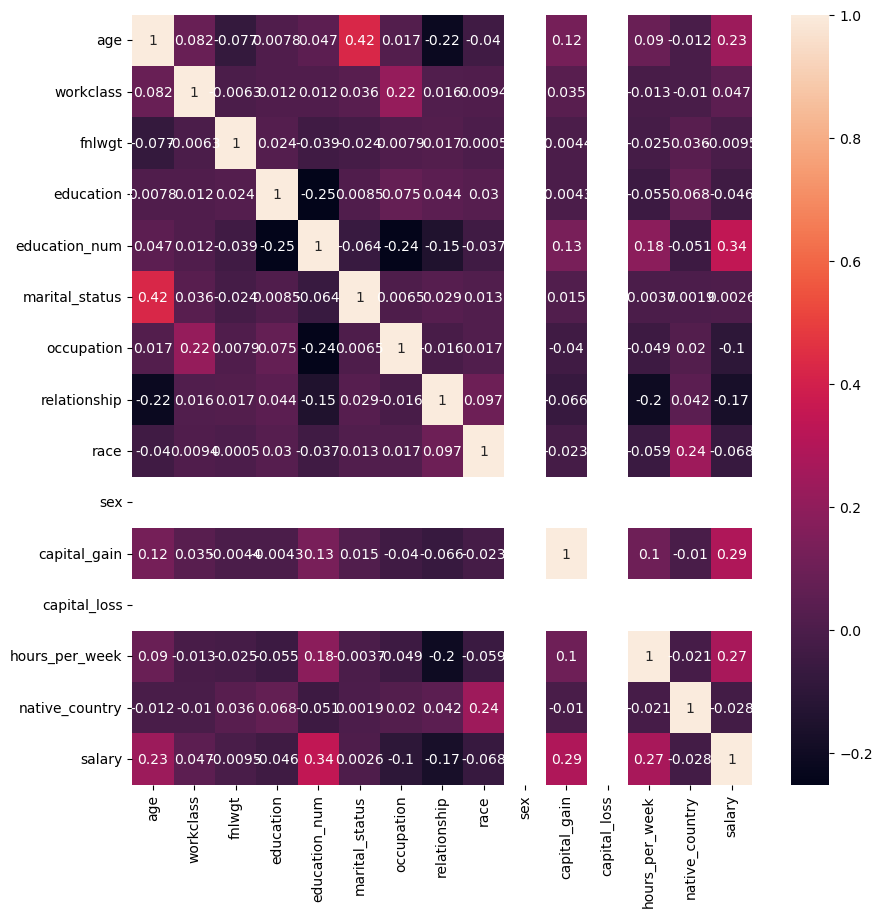

In [33]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [34]:
df = df.drop(['fnlwgt'], axis=1)

In [35]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [36]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


## Train_test_split

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
sc = StandardScaler()

In [39]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [40]:
y = df['salary']

In [41]:
y.value_counts()

salary
0    24720
1     7841
Name: count, dtype: int64

In [42]:
X = sc.fit_transform(X)

In [43]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f'Train data shapr: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Train data shapr: (26048, 13)
Test data shape: (6513, 13)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression()

In [48]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_predict = lg_model.predict(X_test)

In [50]:
result = { 'Actual': y_test, 'Predicted': y_predict}

In [51]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predict)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_predict)}')
print(f'Classification Report: {classification_report(y_test, y_predict)}')

Accuracy Score: 0.8082296944572394
Confusion Matrix: [[4624  318]
 [ 931  640]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4942
           1       0.67      0.41      0.51      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.67      0.69      6513
weighted avg       0.79      0.81      0.79      6513

